<a href="https://colab.research.google.com/github/KONA1005/google_drive/blob/main/Chapter_4_2_%EC%A0%95%EC%8A%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법
- 오차를 줄여가는것
- 샘플링 방식이 다르고, 샘플링을 좀더 세분화하는 다른모델과의 차이점이 있음
- **오차보정-> 기울기를 조정(보정)한다. 손실 감소 오차 감소**


# 경사 = 기울기
- 샘플을 계속 대입해서 가장 낮은 값을 샘플을 다 써서 찾는다.
- 값은 누적(=업데이트)된다. 기울기가 0 이 나올때 까지..
# 에포크 란?
- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정
- 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행

# 확률적 경사 하강법
- 샘플 한개씩 꺼냄

# 미니배치 경사 하강법
- 샘플 여러개씩 꺼냄

# 배치 경사 하강법
- 샘플 몽땅 꺼냄

# 훈련 세트를 다 사용했다? 1 에포크 완료 했다

# 손실함수 = 오차
- loss function
- cost function
- 오차, 손실, cost 같은말로 쓰임
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준. 손실 함수긔 값이 작을 수록 좋다. 어떤 값이 최솟값인지를 몰라서 값을 찾아 **조금씩** 이동하려면 **확률적 경사 하강법**이 잘 맞는다.
- 분류에서 손실은 아주 확실하다. 정답을 못 맞히는 것.

# SGDClassifier
- 확률적 경사하강법 분류기

In [ ]:
import pandas as pd
fish = pd.read_csv("http://bit.ly/fish_csv_data")
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


- 배열로 변환하는 코드
  + 독립변수 = fish_input
  + 종속변수 = fish_target

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

- 훈련 세트와 테스트 세트로 분

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

- 표준화 처리
  + 다시 한번 강조하지만 꼭 훈련세트에서 학습한 통계값으로 테스트 세트도 변환한다
  + 키워드 : Data Leakage 방지

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

# ss = 훈련데이터만 활용해서 이미 학습(?)이 끝난 상태
# 표준화 처리를 훈련데이터와 테스트데이터에 동시 적용
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 모델 학습
- 2개의 매개 변수 지정
- loss = "log" 로지스틱 손실 함수로 지정
- max_iter = 에포크 횟수 지정(올라갈수록 정확도 높아지네?)

In [ ]:
from sklearn.linear_model import SGDClassifier

# 매개변수 지정
# 하이퍼파라미터 설정 -  매개변수 값을 dictionary 형태로 추가하는 코드 작성 가능
# 입문자들에게는 비추천
sc = SGDClassifier(loss= "log", max_iter = 10, random_state = 42)

# 모형 학습
sc.fit(train_scaled, train_target)

# 스코어 점수 확인(정확도)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


- 적절한 에포크 숫자를 찾자

In [ ]:
import numpy as np 
sc = SGDClassifier(loss = "log",  random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)
# partial_fit()메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해줘야 하는데
# 이를 위해 np.unique()함수로 train_target에 있는 7개 생선의 목록을 만든다. 또 에포크마다 훈련 세트와 테스트 세트에 대한
# 점수를 기록하기 위해 2개의 리스트를 준비한것.


for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))
# 여기서 _은 의미 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도.
# 0에서 299까지 반복 횟수를 임시 저장하기 위한 용도로 사용



# 정확도
print(train_score[:5])
print(test_score[:5])

[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521]
[0.65, 0.55, 0.575, 0.7, 0.7]


- 모형 학습 시각화

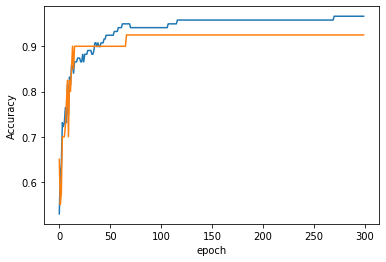

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(train_score)
ax.plot(test_score)
ax.set_xlabel("epoch")
ax.set_ylabel("Accuracy")
plt.show()

100번째 에포크 이후 훈련 세트와 테스트 세트의 점수가 벌어짐. 확실히 에포크 초기에는 **과소적합**되어 훈련 세트와 테스트 세트의 점수가 낮음. 100번째가 적당한 반복횟수로 보임

- 반복횟수 100번으로 늘리고 훈련하고 점수 출력
- tol 매개변수에서 향상될 최솟값 지정. None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록

In [ ]:
sc = SGDClassifier(loss='log',max_iter = 100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


최종 점수가 좋다. 훈련 세트와 테스트 세트에서의 정확도 점수가 비교적 높다.
- 확률적 경사 하강법 사용한 생선 분류도 성공적이다!


확률적 경사 하강법은 손실 함수를 정의하고 가장 가파른 경사를 따라 조금씩 내려오는 알고리즘. 충분히 반복하면 훈련 세트에서 높은 점수를 얻을 수 있다.  
# **하지만 훈련을 반복할수록 모델이 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트 세트의 정확도가 줄어든다**